In [1]:
##import libraries##
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff
import healpy as hp

In [2]:
##Read the tif file##
image = tiff.imread('/media/sf_Shared_Ubuntu/MAPS/gpw_v4_population_density_adjusted_to_2015_unwpp_country_totals_rev11_2020_15_min.tif')
image_array = np.array(image)


In [3]:
# Define the spherical coordinates#
theta = np.linspace(np.radians(0), np.radians(180), num=image_array.shape[0],endpoint=False)
phi = np.linspace(-np.radians(180), np.radians(180), num=image_array.shape[1],endpoint=False)

# Set angular resolution#
nside = 128

## Make empty healpix mask and pixel values vector##
healpix_map = np.zeros(hp.nside2npix(nside), dtype=np.double)
pixel_counts = np.zeros(hp.nside2npix(nside), dtype=int)


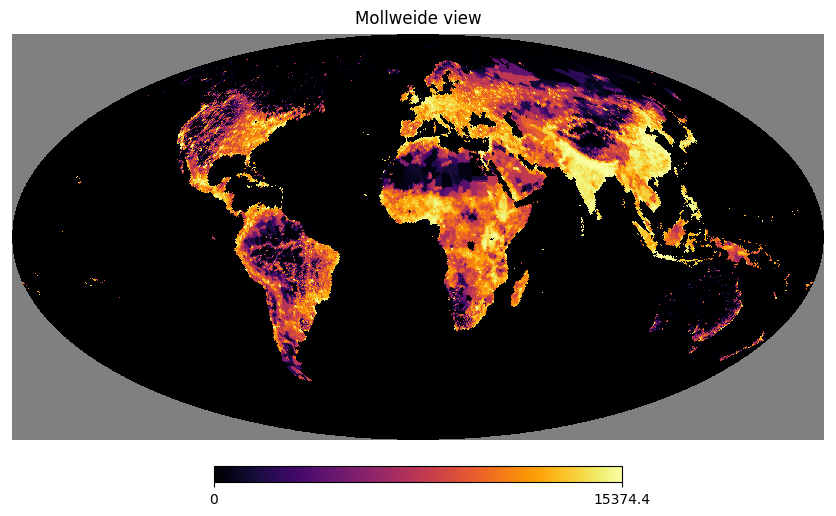

[887 887 887 ... 527 527 527]


In [4]:
for i in range(len(theta)):
    for j in range(len(phi)):
        pixel = hp.ang2pix(nside, theta[i], phi[j])
        healpix_map[pixel] += image_array[i, j]
        pixel_counts[pixel] += 1

# Average value of each pixel#
healpix_map[pixel_counts>0] /= pixel_counts[pixel_counts>0 ]


hp.mollview(healpix_map, cmap="inferno", xsize=3000, flip="geo", norm="hist", min=0)
plt.show()
print(pixel_counts)

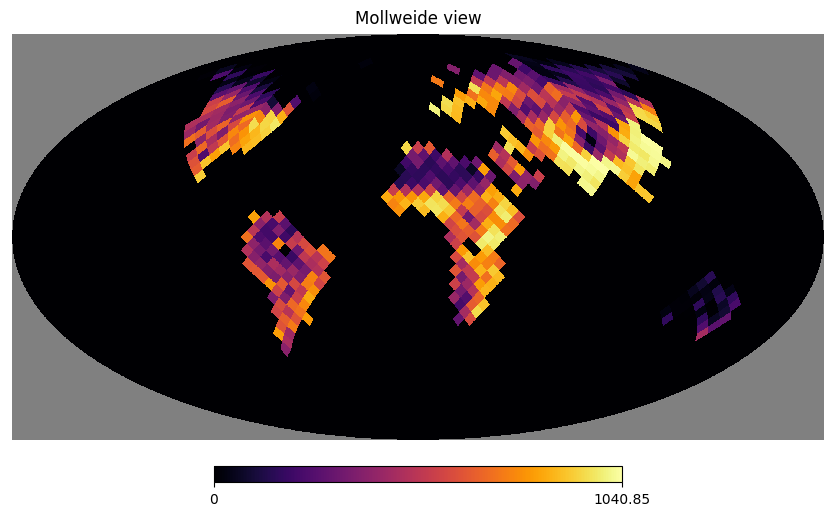

In [5]:
degraded_128=hp.ud_grade(healpix_map,16)
hp.mollview(degraded_128,cmap="inferno", xsize=3000, flip="geo", norm="hist",min=0)

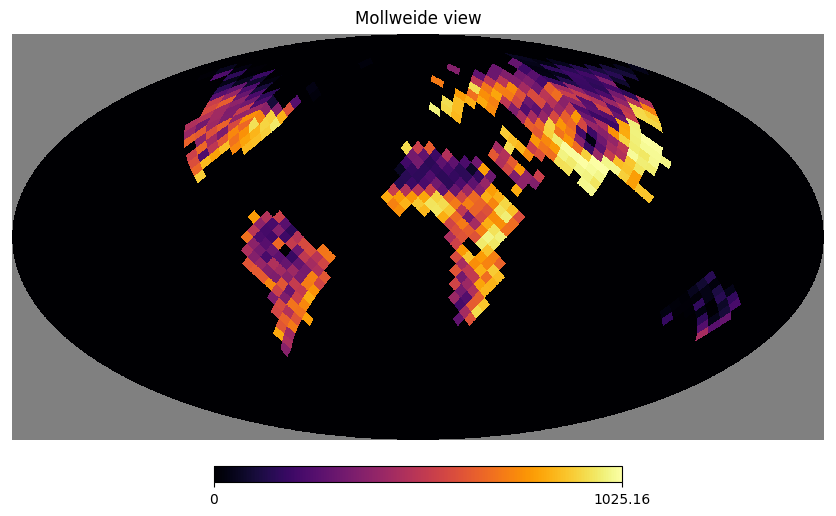

In [6]:
theta = np.linspace(np.radians(0), np.radians(180), num=image_array.shape[0],endpoint=False)
phi = np.linspace(-np.radians(180), np.radians(180), num=image_array.shape[1],endpoint=False)

# Set angular resolution#
nside_new = 16

## Make empty healpix mask and pixel values vector##
healpix_map_32 = np.zeros(hp.nside2npix(nside_new), dtype=np.double)
pixel_counts_32 = np.zeros(hp.nside2npix(nside_new), dtype=int)
for i in range(len(theta)):
    for j in range(len(phi)):
        pixel = hp.ang2pix(nside_new, theta[i], phi[j])
        healpix_map_32[pixel] += image_array[i, j]
        pixel_counts_32[pixel] += 1

# Average value of each pixel#
healpix_map_32[pixel_counts_32>0] /= pixel_counts_32[pixel_counts_32>0 ]


hp.mollview(healpix_map_32, cmap="inferno", xsize=3000, flip="geo", norm="hist", min=0)

In [7]:
healpix_map_32[healpix_map_32<0]=0
degraded_128[degraded_128<0]=0

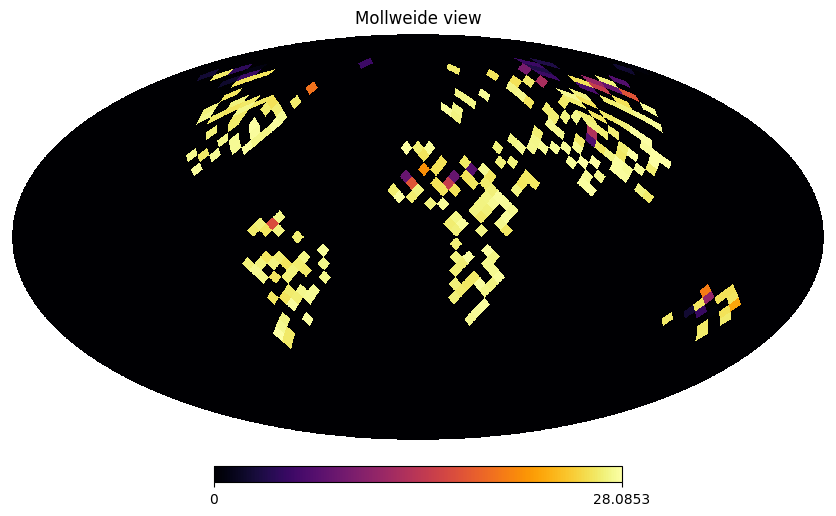

In [14]:
diffmap=-1*(degraded_128-healpix_map_32)
hp.mollview(diffmap,cmap="inferno", xsize=3000, flip="geo", norm="hist",min=0)

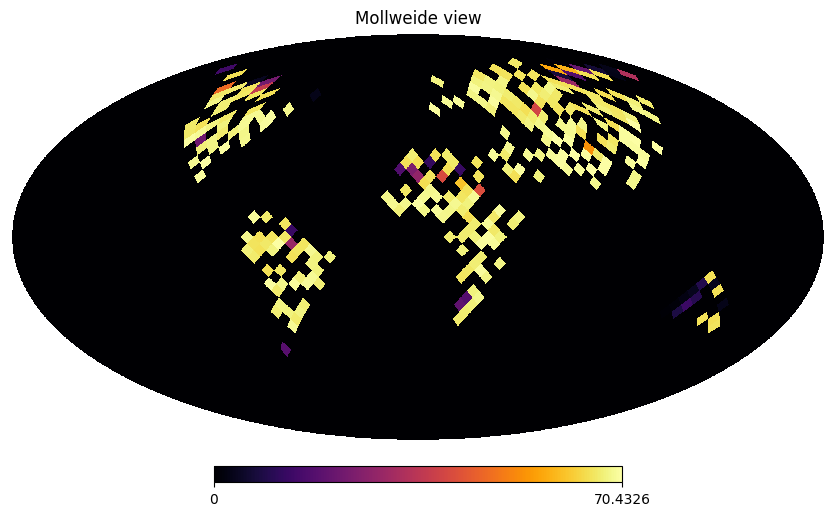

In [15]:
diffmap=(degraded_128-healpix_map_32)
hp.mollview(diffmap,cmap="inferno", xsize=3000, flip="geo", norm="hist",min=0)

In [9]:
if np.array_equal(healpix_map_32, degraded_128):
    print('yes')
else:
    print('no')
nonzeromask=diffmap>0
nzdiff=diffmap[nonzeromask]
print(np.shape(nzdiff))

no
(293,)


In [10]:
map32=0
degrad32=0
for i in range(len(diffmap)):
    if diffmap[i] > 0:
        print(f"Pixel {i} is from healpix_map_32.")
        map32+=1
    elif diffmap[i] < 0:
        print(f"Pixel {i} is from degraded_128.")
        degrad32+=1
    else:
        print(f"Pixel {i} has no difference.")
print(map32,degrad32)

Pixel 0 has no difference.
Pixel 1 has no difference.
Pixel 2 has no difference.
Pixel 3 has no difference.
Pixel 4 has no difference.
Pixel 5 has no difference.
Pixel 6 has no difference.
Pixel 7 has no difference.
Pixel 8 has no difference.
Pixel 9 has no difference.
Pixel 10 has no difference.
Pixel 11 has no difference.
Pixel 12 has no difference.
Pixel 13 has no difference.
Pixel 14 has no difference.
Pixel 15 has no difference.
Pixel 16 has no difference.
Pixel 17 has no difference.
Pixel 18 has no difference.
Pixel 19 has no difference.
Pixel 20 has no difference.
Pixel 21 has no difference.
Pixel 22 has no difference.
Pixel 23 has no difference.
Pixel 24 has no difference.
Pixel 25 has no difference.
Pixel 26 has no difference.
Pixel 27 has no difference.
Pixel 28 has no difference.
Pixel 29 has no difference.
Pixel 30 has no difference.
Pixel 31 has no difference.
Pixel 32 has no difference.
Pixel 33 has no difference.
Pixel 34 has no difference.
Pixel 35 has no difference.
Pi

In [11]:
np.min(healpix_map_32)

0.0

In [12]:
np.min(degraded_128)

0.0

In [13]:
import sys
pixindex=[]
for i in range(np.shape(image_array)[1]):
    for j in range(np.shape(image_array)[0]):
        pixindex+=(np.where(image_array[j,i]))
        
np.set_printoptions(threshold=sys.maxsize)     
print(pixindex)

/tmp/ipykernel_2684/4163712024.py:5: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
  pixindex+=(np.where(image_array[j,i]))
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

